In [1]:
import pandas as pd
import numpy as np
import keras
import copy
import seaborn as sb
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/ForcedLabour/Datasets/Forced_Labour_Dataset.csv')
dataset.head()

,Location,Hygiene,Micromanagement,Working Hours,Salary,Age,Infrastructure,Food Quality,Incentives,Family Size,...,Share Price,Attrition,Contract Workers,Location_Score,Internal_Audit,External_Audit,Fin_Score,Loss_Score,Past_Score,IsUnderRisk
0,Latin America and the Caribbean,3,4,17,35934,64,4,1,429,7,...,924,25,2210,51.8,18.727724,20.751918,19.601371,13.725000,31.715867,0
1,Asia-Pacific,5,8,10,38540,49,10,3,418,4,...,1461,26,7367,8.5,29.409457,19.961096,28.914648,9.353333,30.422133,0
2,Africa,4,3,8,13114,61,9,4,6306,6,...,796,36,6345,8.5,22.281448,18.816696,23.591524,17.634000,28.887333,0
3,Middle East,4,7,10,12905,32,8,5,8139,6,...,435,22,4777,18.0,40.051876,14.794608,25.292048,5.896000,31.508600,0
4,Africa,2,10,17,37665,60,3,4,167,8,...,1213,7,273,18.0,22.840724,25.062735,16.081333,16.110667,21.738867,0


In [3]:
# No Null Values
dataset.isna().sum()

Location            0
Hygiene             0
Micromanagement     0
Working Hours       0
Salary              0
Age                 0
Infrastructure      0
Food Quality        0
Incentives          0
Family Size         0
Experience          0
Share Price         0
Attrition           0
Contract Workers    0
Location_Score      0
Internal_Audit      0
External_Audit      0
Fin_Score           0
Loss_Score          0
Past_Score          0
IsUnderRisk         0
dtype: int64

In [4]:
dataset.drop(['Location'], axis=1, inplace=True)

In [5]:
# Function for visualizing the distribution of data

def visualize(values, title, xlabel, ylabel):
  plt.hist(values)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

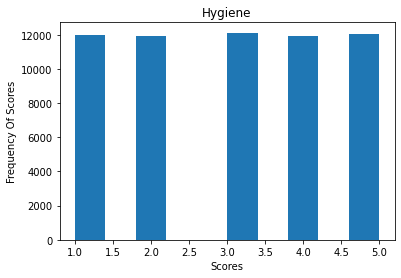

In [6]:
visualize(dataset['Hygiene'], 'Hygiene', 'Scores', 'Frequency Of Scores')

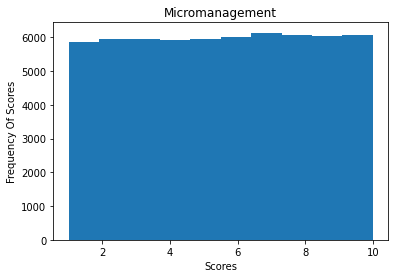

In [7]:
visualize(dataset['Micromanagement'], 'Micromanagement', 'Scores', 'Frequency Of Scores')

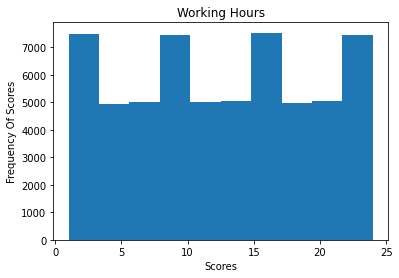

In [8]:
visualize(dataset['Working Hours'], 'Working Hours', 'Scores', 'Frequency Of Scores')

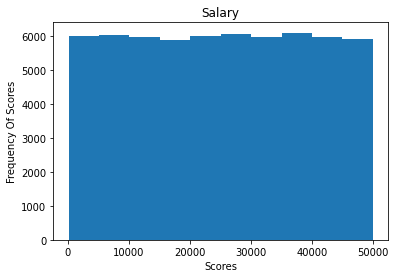

In [9]:
visualize(dataset['Salary'], 'Salary', 'Scores', 'Frequency Of Scores')

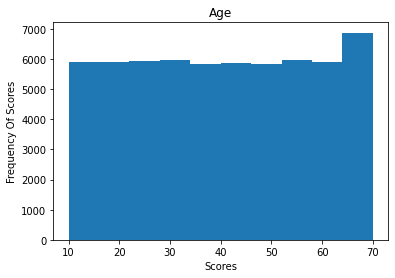

In [10]:
visualize(dataset['Age'], 'Age', 'Scores', 'Frequency Of Scores')

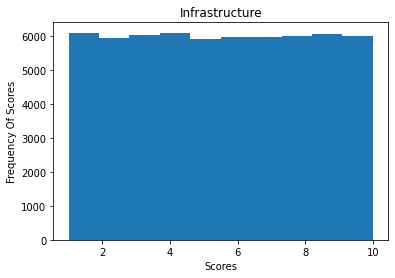

In [11]:
visualize(dataset['Infrastructure'], 'Infrastructure', 'Scores', 'Frequency Of Scores')

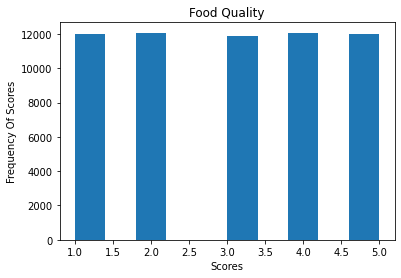

In [12]:
visualize(dataset['Food Quality'], 'Food Quality', 'Scores', 'Frequency Of Scores')

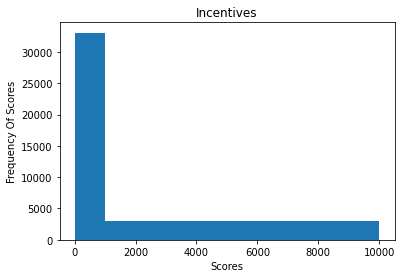

In [13]:
visualize(dataset['Incentives'], 'Incentives', 'Scores', 'Frequency Of Scores')

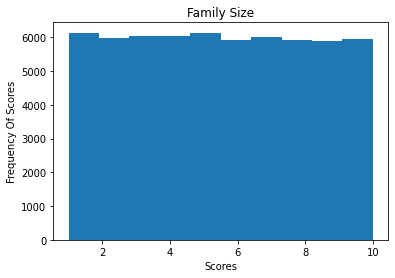

In [14]:
visualize(dataset['Family Size'], 'Family Size', 'Scores', 'Frequency Of Scores')

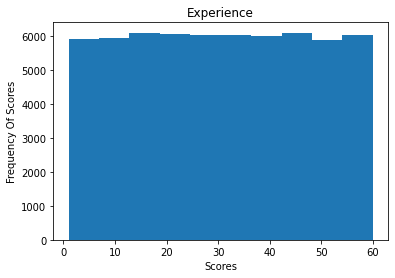

In [15]:
visualize(dataset['Experience'], 'Experience', 'Scores', 'Frequency Of Scores')

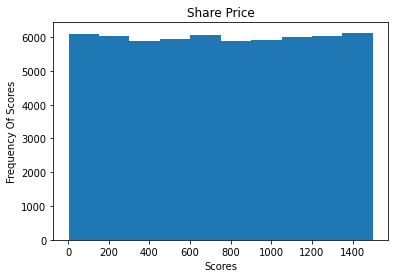

In [16]:
visualize(dataset['Share Price'], 'Share Price', 'Scores', 'Frequency Of Scores')

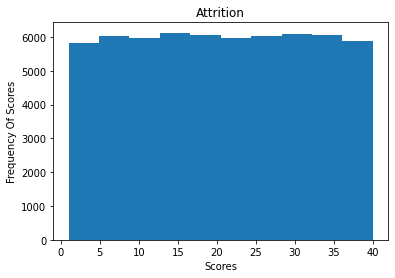

In [17]:
visualize(dataset['Attrition'], 'Attrition', 'Scores', 'Frequency Of Scores')

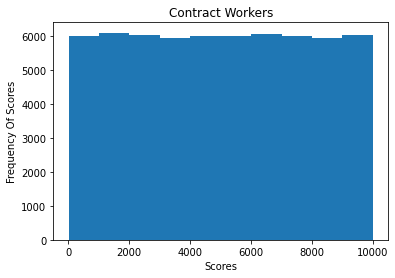

In [18]:
visualize(dataset['Contract Workers'], 'Contract Workers', 'Scores', 'Frequency Of Scores')

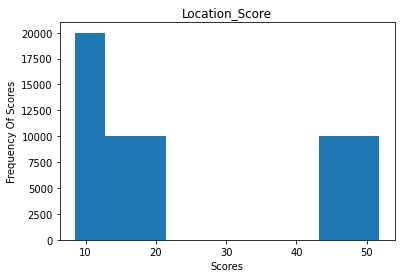

In [19]:
visualize(dataset['Location_Score'], 'Location_Score', 'Scores', 'Frequency Of Scores')

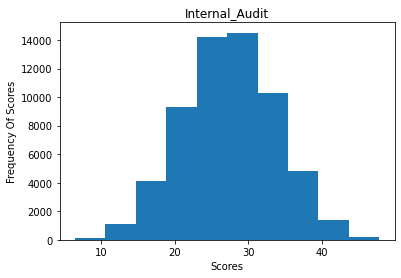

In [20]:
visualize(dataset['Internal_Audit'], 'Internal_Audit', 'Scores', 'Frequency Of Scores')

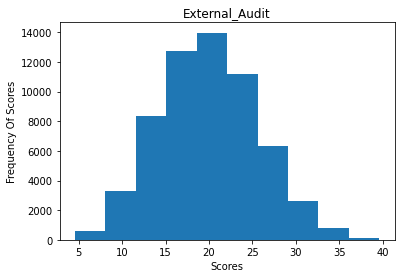

In [21]:
visualize(dataset['External_Audit'], 'External_Audit', 'Scores', 'Frequency Of Scores')

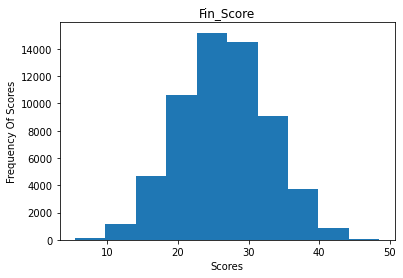

In [22]:
visualize(dataset['Fin_Score'], 'Fin_Score', 'Scores', 'Frequency Of Scores')

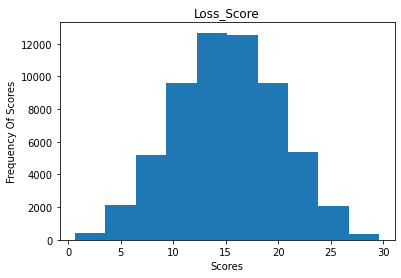

In [23]:
visualize(dataset['Loss_Score'], 'Loss_Score', 'Scores', 'Frequency Of Scores')

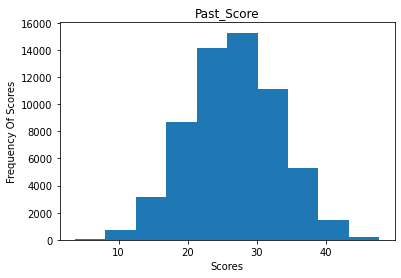

In [24]:
visualize(dataset['Past_Score'], 'Past_Score', 'Scores', 'Frequency Of Scores')

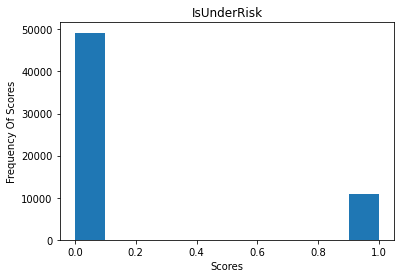

In [25]:
visualize(dataset['IsUnderRisk'], 'IsUnderRisk', 'Scores', 'Frequency Of Scores')

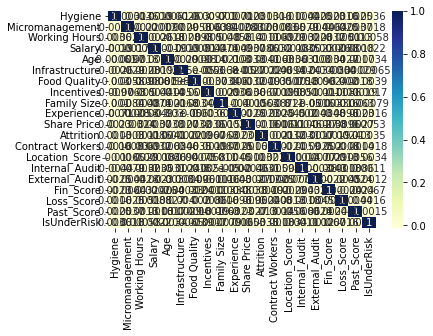

In [26]:
# plotting correlation heatmap
dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [27]:
dataset.corr()

,Hygiene,Micromanagement,Working Hours,Salary,Age,Infrastructure,Food Quality,Incentives,Family Size,Experience,Share Price,Attrition,Contract Workers,Location_Score,Internal_Audit,External_Audit,Fin_Score,Loss_Score,Past_Score,IsUnderRisk
Hygiene,1.000000,-0.003073,0.003552,-0.001876,-0.000605,-0.002631,-0.003010,-0.009660,-0.001004,-0.007124,0.002259,0.001346,0.001642,-0.010164,-0.004363,0.002487,0.002254,0.001558,0.002501,0.003558
Micromanagement,-0.003073,1.000000,0.002232,-0.000174,0.009713,0.002876,0.005777,-0.006286,0.008387,-0.000282,-0.000320,0.000297,-0.000835,0.006489,0.007939,-0.004394,-0.006364,0.002526,0.003706,0.001777
Working Hours,0.003552,0.002232,1.000000,-0.002630,0.001800,-0.002822,-0.009816,0.004976,-0.004826,0.005846,0.013741,-0.001127,-0.006908,0.002857,-0.003159,0.002827,0.003249,-0.005077,0.001330,0.000576
Salary,-0.001876,-0.000174,-0.002630,1.000000,-0.001948,-0.001900,-0.000805,-0.004423,0.007374,-0.004868,0.003660,0.008612,0.003242,0.000184,-0.003471,-0.002339,-0.000261,0.008763,-0.001782,0.002190
Age,-0.000605,0.009713,0.001800,-0.001948,1.000000,0.002874,-0.000985,0.001384,-0.002147,-0.003016,0.003251,-0.004128,-0.006338,-0.003582,-0.003064,-0.002979,0.003351,0.002742,-0.001726,-0.003448
Infrastructure,-0.002631,0.002876,-0.002822,-0.001900,0.002874,1.000000,-0.000065,0.005633,0.006774,-0.000033,0.002749,0.000218,0.004622,0.009366,-0.002352,-0.003357,-0.000333,0.003958,0.000292,-0.000648
Food Quality,-0.003010,0.005777,-0.009816,-0.000805,-0.000985,-0.000065,1.000000,-0.003716,-0.003429,0.006021,0.003223,-0.001907,0.003535,-0.000755,0.001750,0.000964,-0.002422,-0.001996,0.001839,-0.003863
Incentives,-0.009660,-0.006286,0.004976,-0.004423,0.001384,0.005633,-0.003716,1.000000,-0.002925,0.003565,0.003645,0.006658,-0.001889,0.005804,0.005071,0.000115,-0.001057,-0.008622,-0.000190,-0.001718
Family Size,-0.001004,0.008387,-0.004826,0.007374,-0.002147,0.006774,-0.003429,-0.002925,1.000000,0.003983,-0.001539,0.006279,0.008740,-0.011200,0.000082,-0.001635,0.000328,0.001565,-0.006348,0.000795
Experience,-0.007124,-0.000282,0.005846,-0.004868,-0.003016,-0.000033,0.006021,0.003565,0.003983,1.000000,0.002504,-0.002295,-0.002519,0.004487,-0.001964,0.004318,0.004790,0.009576,-0.002252,-0.001634


In [28]:
def getModel(inputShape=19, outputShape=1):

    inputs = keras.Input(shape=(inputShape), name="input_params")
    x = layers.Dense(10, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(20, activation="relu", name="dense_2")(inputs)
    x = layers.Dense(10, activation="relu", name="dense_3")(inputs)
    outputs = layers.Dense(outputShape, activation="sigmoid", name="predictions")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [29]:
def prepareClientDatasets(num_clients, xTrain, yTrain):

    samples_per_client = (int)(xTrain.shape[0]/num_clients)

    client_datasets = {}

    for i in range(num_clients):
        
        x_values = xTrain[i*samples_per_client:(i+1)*samples_per_client]
        y_values = yTrain[i*samples_per_client:(i+1)*samples_per_client]

        modelTypeMap = {'x':x_values, 'y':y_values}

        client_datasets["client_" + str(i+1)] = modelTypeMap
    
    return client_datasets

def getClientModels(num_clients, inputShape, outputShape):
    
    client_models = {}

    for i in range(num_clients):

        client_models["client_" + str(i+1)] = getModel(inputShape, outputShape)

    return client_models

def getGlobalModel(inputShape, outputShape):

    return getModel(inputShape, outputShape)

def updateGlobalModel(num_clients, client_models, global_model):


    client_wts_sum = client_models["client_1"].get_weights()

    for i in range(len(client_wts_sum)):

        for j in range(len(client_wts_sum[i])):

            client_wts_sum[i][j] = client_wts_sum[i][j]/num_clients 


    for k in range(1, num_clients):

        temp_wts = client_models["client_"+str(k+1)].get_weights()

        for i in range(len(client_wts_sum)):

            for j in range(len(client_wts_sum[i])):

                client_wts_sum[i][j] = client_wts_sum[i][j] + temp_wts[i][j]/num_clients

    global_model.set_weights(client_wts_sum)

    return global_model


In [30]:
print(dataset['Location_Score'].min())
print(dataset['Location_Score'].max())
print(dataset['Internal_Audit'].min())
print(dataset['Internal_Audit'].max())
print(dataset['External_Audit'].min())
print(dataset['External_Audit'].max())
print(dataset['Fin_Score'].min())
print(dataset['Fin_Score'].max())
print(dataset['Loss_Score'].min())
print(dataset['Loss_Score'].max())
print(dataset['Past_Score'].min())
print(dataset['Past_Score'].max())

8.5
51.8
6.449409523809524
47.84468571428572
4.547583329761548
39.62196219621962
5.405571428571429
48.50975238095238
0.6436666666666667
29.626
3.688866666666667
47.757000000000005


In [31]:
numGlobalRounds = 20
numLocalRounds = 1
num_clients = 6
inputShape = 10
outputShape = 1

x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x)


numGlobalRounds = 20
numLocalRounds = 2
num_clients = 5
inputShape = 19
outputShape = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

client_datasets = prepareClientDatasets(num_clients, x_train, y_train)
client_models = getClientModels(num_clients, inputShape, outputShape)
global_model = getGlobalModel(inputShape, outputShape)

print("==================================================>> Starting Federated Learning <<=============================================\n")

for i in range(numGlobalRounds):

    print("===============================>>>>> Starting iteration number : " + str(i+1) + " <<<<<===============================\n\n")

    for j in range(num_clients):

        print("================================>>>>>> Training Client Model : ", str(j+1) + " <<<<<================================\n")

        client_models["client_" + str(j+1)].fit(
        client_datasets["client_" + str(j+1)]['x'],
        client_datasets["client_" + str(j+1)]['y'],
        batch_size=32,
        epochs=numLocalRounds,
        validation_data=((x_test, y_test)))
        
    global_model = updateGlobalModel(num_clients, client_models, global_model)

    print("===========>>>>>   Testing Global Model   <<<<<==========\n\n")

    print("R squared " + " : ", r2_score(y_test, global_model.predict(x_test)))
    
    client_models = getClientModels(num_clients, inputShape, outputShape)

    for c in range(num_clients):
        client_models["client_" + str(c+1)].set_weights(global_model.get_weights())

global_model.save('/content/drive/MyDrive/ForcedLabour/fed-forced_labour.h5')

==================================================>> Starting Federated Learning <<=============================================

===============================>>>>> Starting iteration number : 1 <<<<<===============================


================================>>>>>> Training Client Model :  1 <<<<<================================

Epoch 1/2
300/300 [==============================] - 2s 4ms/step - loss: 0.6002 - accuracy: 0.6856 - val_loss: 0.4793 - val_accuracy: 0.8188
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8185 - val_loss: 0.4782 - val_accuracy: 0.8188
================================>>>>>> Training Client Model :  2 <<<<<================================

Epoch 1/2
300/300 [==============================] - 2s 4ms/step - loss: 0.4868 - accuracy: 0.8209 - val_loss: 0.4794 - val_accuracy: 0.8188
Epoch 2/2
300/300 [==============================] - 1s 4ms/step - loss: 0.4742 - accuracy: 0.8228 - val_loss: 0.4786 - val_accurac